<center><img src="https://www.mindinventory.com/blog/wp-content/uploads/2019/04/python-development-1200x500.png" width="1000"></center>

## Machine Learning con Python: preprocesamiento, modelamiento, testeo y despliegue de modelo

## Tema: Despliegue de modelos

### Caso: Marketing Directo de una institución bancaria portuguesa

### Manuel Sigüeñas, M.Sc.(c)
### Prof. Lenguajes de Programación para Ciencia de Datos / Agile Data Scientists / SCRUMStudy Certified Trainer


[msiguenas@socialdata-peru.com](msiguenas@socialdata-peru.com)

In [1]:
from IPython.display import Image
%matplotlib inline

### Instalar los siguientes packetes

In [18]:
Image(filename='D:/Python/webinar/01_10.png', width=600) 

In [19]:
Image(filename='D:/Python/webinar/01_11.png', width=600) 

In [20]:
Image(filename='D:/Python/webinar/01_12.png', width=600) 

### [Ir a Inicio](#beginning)

_____

<a id='part3'></a>
## Encontrando el mejor modelo

### DESCRIPCIÓN
Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente para acceder si el producto (depósito bancario a plazo) estaría ('sí') o no ('no') suscrito.

### Información del atributo:

### Variables de entrada:
   #### datos del cliente bancario:
   1 - age :edad del cliente (numérico)
   
   2 - job: tipo de trabajo (categórico: "administrador", "desconocido", "desempleado", "gerencia", "empleada doméstica", "empresario", "estudiante",
                                       "obrero", "autónomo", "jubilado", "técnico", "servicios")
                                       
   3 - marital: estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" significa divorciado o viudo)
   
   4 - education :educacion del cliente (categórica: "desconocido", "secundario", "primario", "terciario")
   
   5 - default: incumplimiento del cliente ¿tiene crédito en incumplimiento? (binario: "sí", "no")
   
   6 - balance: saldo medio anual, en euros (numérico)
   
   7 - housing: tiene préstamo de vivienda? (binario: "sí", "no")
   
   8 - loan: tiene préstamo personal? (binario: "sí", "no")
   
   #### relacionado con el último contacto de la campaña actual:
   9 - contact: tipo de comunicación de contacto (categórico: "desconocido", "teléfono", "celular")
   
  10 day: último día de contacto del mes (numérico)
  
  11 month: último contacto del año del año (categórico: "ene", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: duración del último contacto, en segundos (numérico)
  
   #### otros atributos:
  13 - campaign: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
  
  14 pdays: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)
  
  15 - previous: número de contactos realizados antes de esta campaña y para este cliente (numérico)
  
  16 - poutcome: resultado de la campaña de marketing anterior (categórico: "desconocido", "otro", "fracaso", "éxito")

  ### Variable de salida (objetivo deseado):
  17 - y - ¿el cliente ha suscrito un depósito a plazo? (binario: "sí", "no")

**Fuente :**
    
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [21]:
#!pip install matplotlib

In [22]:
#!pip install os

In [53]:
#Declarar array
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.estimator_base import H2OEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [2]:
%matplotlib inline #para mostrar la figura cuando utilicemos matplotlib

UsageError: unrecognized arguments: #para mostrar la figura cuando utilicemos matplotlib


In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\SOCIAL~1\AppData\Local\Temp\tmp9ixcpm0m
  JVM stdout: C:\Users\SOCIAL~1\AppData\Local\Temp\tmp9ixcpm0m\h2o_SOCIAL_DATA_started_from_python.out
  JVM stderr: C:\Users\SOCIAL~1\AppData\Local\Temp\tmp9ixcpm0m\h2o_SOCIAL_DATA_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,8 months !!!
H2O_cluster_name:,H2O_from_python_SOCIAL_DATA_eo7oxn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.526 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


In [6]:
#h2o.shutdown()

In [ ]:
#pip install numpy

In [ ]:
#pip install os

In [6]:
import numpy as np
import pandas as pd
import os

In [7]:
os.chdir("D:/Python/3. Nivel III/4/datos") # la ruta absoluta

In [8]:
df_py = pd.read_csv("bank-full.csv",sep=';')
df_py.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df_py.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
na_ratio = ((df_py.isnull().sum() / len(df_py))*100)
print(na_ratio)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


In [11]:
df_cont=df_py.loc[:, ["age","balance","day","duration","y"]]

In [10]:
#!pip install seaborn

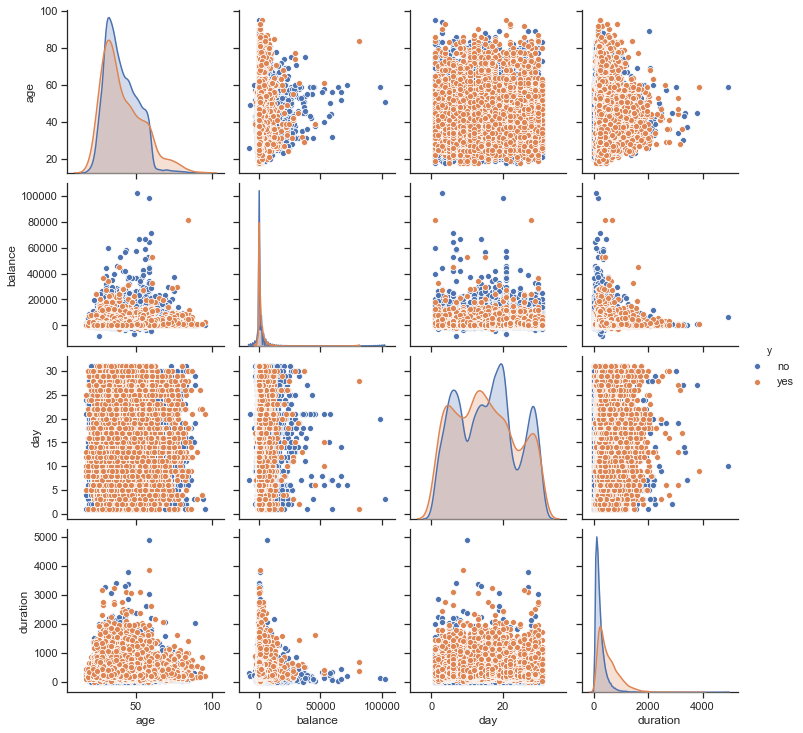

In [12]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df_cont, hue="y")

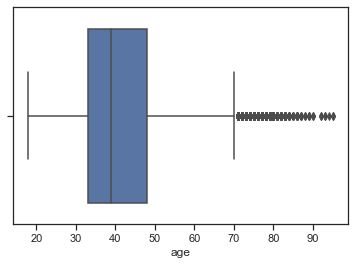

In [13]:
ax = sns.boxplot(x=df_cont["age"])

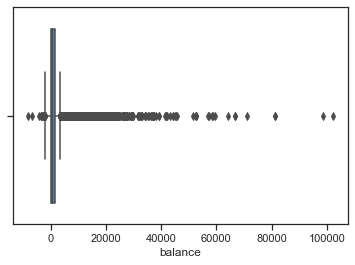

In [14]:
ax = sns.boxplot(x=df_cont["balance"])

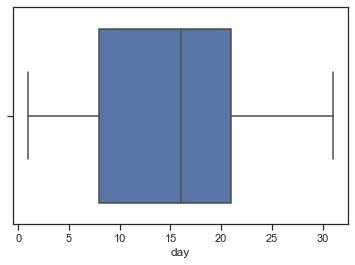

In [15]:
ax = sns.boxplot(x=df_cont["day"])

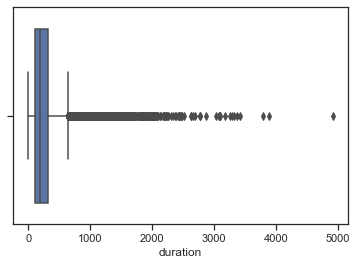

In [16]:
ax = sns.boxplot(x=df_cont["duration"])

In [17]:
count_classes = pd.value_counts(df_py["y"], sort =True)

In [18]:
count_classes

no     39922
yes     5289
Name: y, dtype: int64

In [19]:
import matplotlib.pyplot as plt

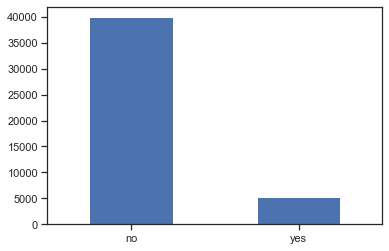

In [20]:
count_classes.plot(kind="bar",
                   rot=0)
plt.show()

In [21]:
df_py.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [43]:
#Paso 0

In [22]:
from collections import defaultdict
from sklearn import preprocessing

In [24]:
d=defaultdict(preprocessing.LabelEncoder)

In [25]:
tipos = df_py.columns.to_series().groupby(df_py.dtypes).groups 
tipos

{dtype('int64'): Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'),
 dtype('O'): Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome', 'y'],
       dtype='object')}

In [26]:
list_text = list(tipos[np.dtype("object")])

In [27]:
list_text

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [28]:
fit=df_py.apply(lambda x: d[x.name].fit(x) if x.name in list_text else x) 

In [29]:
df_py2=df_py.apply(lambda x: d[x.name].transform(x) if x.name in list_text else x) 

In [30]:
df_py2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [33]:
#Paso 1: Particionar los datos

In [31]:
from sklearn.model_selection import train_test_split

X, y = df_py2.iloc[:, df_py.columns != 'y'].values, df_py2.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=2020,   
                     stratify=y)

In [57]:
#Paso 2: Balancear los datos por SmoteTomek

In [36]:
# predictores del modelo
training_columns = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']
# target del modelo
response_column = 'y'

In [37]:
#0.7
from imblearn.combine import SMOTETomek
os_us = SMOTETomek(0.7)
X_t_st, y_t_st = os_us.fit_sample(X_train, y_train)

In [38]:
#Paso 3: Construir los data frame para los datos de entrenamiento balanceado

In [39]:

#Datos de entrenamiento
x_t_st= pd.DataFrame(X_t_st, columns=training_columns)
y_t_st= pd.DataFrame(y_t_st, columns=["y"])

entrenamiento_smotetomek = pd.concat([x_t_st, y_t_st], axis=1)
entrenamiento_smotetomek.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,1,0,1,0,178,1,0,0,15,8,188,1,-1,0,3,0
1,27,4,2,2,0,1995,1,0,2,28,8,239,2,-1,0,3,0
2,61,6,0,2,0,52587,0,0,0,15,3,394,3,189,1,2,1
3,30,4,2,2,0,218,0,0,2,3,6,75,1,-1,0,3,0
4,43,4,1,2,0,445,0,1,2,20,6,196,4,-1,0,3,0


In [ ]:
#Paso 4: Construir los data frame para los datos de testeo

In [40]:
x_test_sb= pd.DataFrame(X_test, columns=training_columns)
y_test_sb= pd.DataFrame(y_test, columns=["y"])

testeo = pd.concat([x_test_sb, y_test_sb], axis=1)
testeo.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,2,1,2,0,606,1,0,0,2,3,194,1,-1,0,3,0
1,28,4,2,2,0,1720,0,0,0,14,11,230,1,91,4,2,1
2,35,9,0,1,0,308,0,0,0,22,1,77,2,-1,0,3,0
3,22,7,2,1,0,361,0,0,1,1,11,232,1,86,6,0,0
4,40,0,2,1,0,462,1,1,0,6,0,272,1,335,4,1,0


In [41]:
count_classes = pd.value_counts(entrenamiento_smotetomek["y"], sort =True)

In [42]:
count_classes

0    27251
1    18867
Name: y, dtype: int64

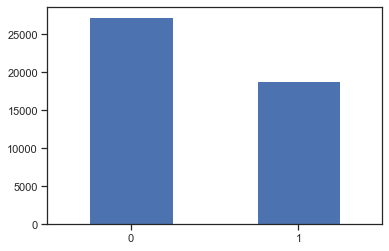

In [43]:
count_classes.plot(kind="bar",
                   rot=0)
plt.show()

In [44]:
#Paso 5: que la etiqueta del target se codifique en sí(1) y no(0)

In [45]:
entrenamiento_smotetomek["y"] = entrenamiento_smotetomek["y"].replace({0: 'Si', 1: 'No'})

In [46]:
testeo["y"] = testeo["y"].replace({0: 'Si', 1: 'No'})

In [47]:
#Paso 6: convertir a data de h2o

In [48]:
train = h2o.H2OFrame(entrenamiento_smotetomek)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [49]:
test = h2o.H2OFrame(testeo)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [50]:
len(train)

46118

In [51]:
len(test)

13564

In [75]:
#Paso 6: etiquetas de las columnas de los predictores y target

In [52]:
train["y"]

y
Si
Si
No
Si
Si
Si
Si
Si
Si
No


In [82]:
#Paso 7: crear la función models 

In [76]:
rows_list_score = [] #objeto vacío tipo lista
#max = .7 #El porcentaje para el balanceo de datos
#balance_class= True activa el balanceo de datos
#max_after_balance_size el porcentaje para el balanceo
models = [[H2ORandomForestEstimator(ntrees=50, #número de árboles
                                    max_depth=3, #Máxima profundidad
                                    nfolds=10, #cv
                                    #balance_classes = True, #balanceo
                                    seed=1234),#semilla
                                    "Random Forest"],
[H2OGradientBoostingEstimator(build_tree_one_node=True, 
                              seed=1234, #semilla
                              nfolds=10),#cv
                              #balance_classes = True,#balanceo
                              "Gradient Boosting"]]

Random Forest
drf Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.1187676435492577
RMSE: 0.34462681780334176
LogLoss: 0.3943205004334699
Mean Per-Class Error: 0.18616144606925933
AUC: 0.8790471066182879
AUCPR: 0.9815869934058946
Gini: 0.7580942132365758

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2875956104199091: 


,,No,Si,Error,Rate
0,No,177.0,1410.0,0.8885,(1410.0/1587.0)
1,Si,97.0,11880.0,0.0081,(97.0/11977.0)
2,Total,274.0,13290.0,0.1111,(1507.0/13564.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.287596,0.940357,375.0
1,max f2,0.197758,0.974183,399.0
2,max f0point5,0.468706,0.936191,291.0
3,max accuracy,0.324137,0.890445,357.0
4,max precision,0.946173,1.000000,0.0
5,max recall,0.197758,1.000000,399.0
6,max specificity,0.946173,1.000000,0.0
7,max absolute_mcc,0.570732,0.448722,242.0
8,max min_per_class_accuracy,0.590597,0.805627,231.0
9,max mean_per_class_accuracy,0.631646,0.813839,208.0



Gains/Lift Table: Avg response rate: 88,30 %, avg score: 68,78 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010100,0.933103,1.132504,1.132504,1.000000,0.939559,1.000000,0.939559,0.011439,0.011439,13.250397,13.250397
1,,2,0.020053,0.925552,1.132504,1.132504,1.000000,0.929092,1.000000,0.934364,0.011272,0.022710,13.250397,13.250397
2,,3,0.030006,0.921115,1.132504,1.132504,1.000000,0.923544,1.000000,0.930775,0.011272,0.033982,13.250397,13.250397
3,,4,0.040106,0.917623,1.132504,1.132504,1.000000,0.919170,1.000000,0.927852,0.011439,0.045420,13.250397,13.250397
4,,5,0.050059,0.916436,1.132504,1.132504,1.000000,0.917047,1.000000,0.925704,0.011272,0.056692,13.250397,13.250397
5,,6,0.102035,0.908025,1.132504,1.132504,1.000000,0.911923,1.000000,0.918684,0.058863,0.115555,13.250397,13.250397
6,,7,0.150103,0.893820,1.129030,1.131391,0.996933,0.901279,0.999018,0.913110,0.054271,0.169825,12.903003,13.139149
7,,8,0.200015,0.838878,1.125813,1.129999,0.994092,0.863744,0.997788,0.900791,0.056191,0.226017,12.581266,12.999935
8,,9,0.299985,0.811943,1.127493,1.129164,0.995575,0.823510,0.997051,0.875037,0.112716,0.338733,12.749289,12.916407
9,,10,0.400103,0.764138,1.106652,1.123531,0.977172,0.787019,0.992077,0.853012,0.110796,0.449528,10.665152,12.353074




!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


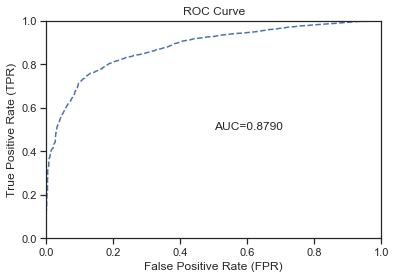

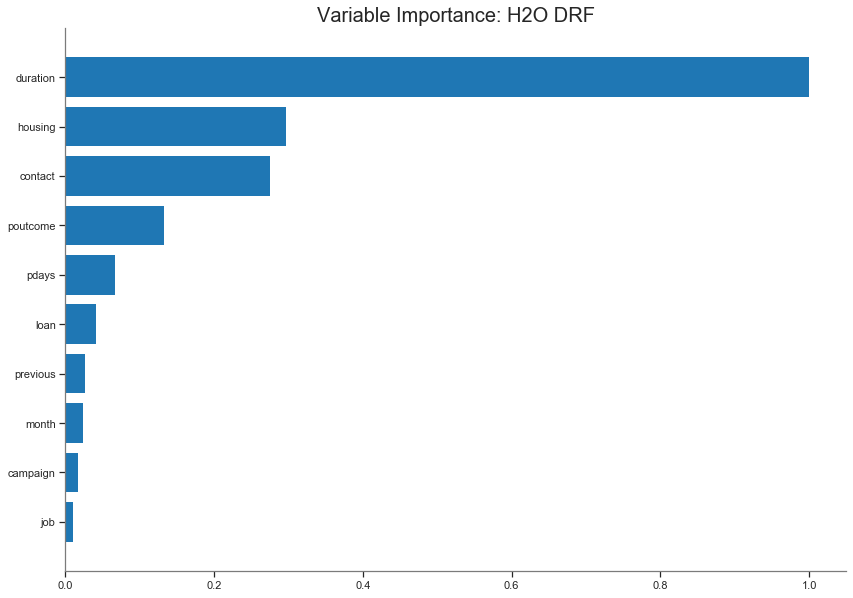

----------------------------------------------
-----------------------------------------------
Gradient Boosting
gbm Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.08531234325883343
RMSE: 0.29208276782246745
LogLoss: 0.2736185235438003
Mean Per-Class Error: 0.15092127586064852
AUC: 0.9161520934448031
AUCPR: 0.9881054819347498
Gini: 0.8323041868896062

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2143207239671516: 


,,No,Si,Error,Rate
0,No,572.0,1015.0,0.6396,(1015.0/1587.0)
1,Si,337.0,11640.0,0.0281,(337.0/11977.0)
2,Total,909.0,12655.0,0.0997,(1352.0/13564.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.214321,0.945112,341.0
1,max f2,0.048203,0.974278,398.0
2,max f0point5,0.502431,0.948635,245.0
3,max accuracy,0.226947,0.900398,336.0
4,max precision,0.988901,1.000000,0.0
5,max recall,0.048203,1.000000,398.0
6,max specificity,0.988901,1.000000,0.0
7,max absolute_mcc,0.492457,0.532695,248.0
8,max min_per_class_accuracy,0.663497,0.841840,197.0
9,max mean_per_class_accuracy,0.747836,0.849079,168.0



Gains/Lift Table: Avg response rate: 88,30 %, avg score: 78,65 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010027,0.986900,1.132504,1.132504,1.000000,0.987869,1.000000,0.987869,0.011355,0.011355,13.250397,13.250397
1,,2,0.020053,0.985731,1.132504,1.132504,1.000000,0.986288,1.000000,0.987079,0.011355,0.022710,13.250397,13.250397
2,,3,0.030006,0.984923,1.132504,1.132504,1.000000,0.985313,1.000000,0.986493,0.011272,0.033982,13.250397,13.250397
3,,4,0.040032,0.984258,1.132504,1.132504,1.000000,0.984590,1.000000,0.986017,0.011355,0.045337,13.250397,13.250397
4,,5,0.050059,0.983598,1.132504,1.132504,1.000000,0.983937,1.000000,0.985600,0.011355,0.056692,13.250397,13.250397
5,,6,0.100044,0.980647,1.132504,1.132504,1.000000,0.982073,1.000000,0.983838,0.056608,0.113300,13.250397,13.250397
6,,7,0.150029,0.977876,1.132504,1.132504,1.000000,0.979306,1.000000,0.982328,0.056608,0.169909,13.250397,13.250397
7,,8,0.200015,0.974914,1.132504,1.132504,1.000000,0.976477,1.000000,0.980866,0.056608,0.226517,13.250397,13.250397
8,,9,0.299985,0.966258,1.130834,1.131947,0.998525,0.970910,0.999508,0.977548,0.113050,0.339568,13.083361,13.194732
9,,10,0.400029,0.950655,1.128331,1.131043,0.996315,0.959091,0.998710,0.972932,0.112883,0.452451,12.833114,13.104294




!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


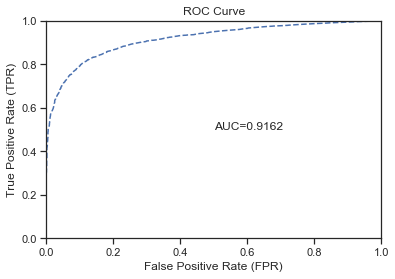

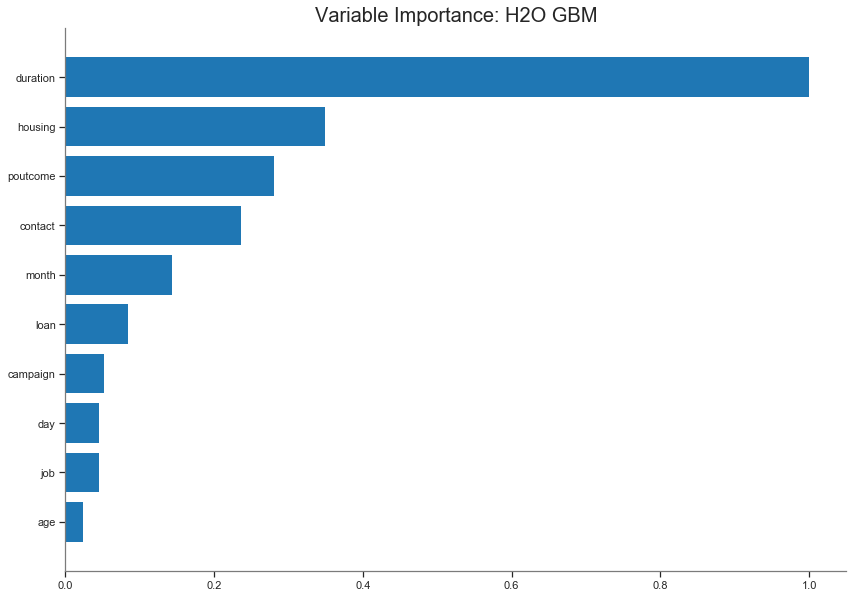

----------------------------------------------
-----------------------------------------------


In [77]:
for i in range(len(models)):
        print(models[i][1].title())#El titulo del Modelo
        models[i][0].train(x=training_columns, #etiquetas de los predictores
                           y=response_column, #etiquetas del target
                           training_frame=train)#la data del modelo
        
        performance = models[i][0].model_performance(test_data=test)#Los resultados de evaluacion con la data de testeo
        #Agregamos el puntaje AUC
        #1.Nombre del modelo,2.El auc de la data de entrenamiento,3.el auc de la data de testeo
        rows_list_score.append([models[i][1],models[i][0].auc(),performance.auc()])
        #la métrica para la evaluación de modelos es el área bajo la curva roc (auc)

        print(performance)
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

        performance.plot(type = "roc")#Generar la curva roc
        models[i][0].varimp_plot()#Generamos las variables mas importantes.
        #PD:Obviamente naive bayes saldra error ya que
        #naive bayes no tiene variables mas importantes como Random Forest y Gradient Boosting
       
        print("----------------------------------------------")
        print("-----------------------------------------------")

In [78]:
print(rows_list_score)#La lista de puntajes

[['Random Forest', 0.9102356049757107, 0.8790471066182879], ['Gradient Boosting', 0.963718883980847, 0.9161520934448031]]


In [79]:
models[1][0]

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1607119127943_1339


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,22503.0,5.0,5.0,5.0,27.0,32.0,31.14




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07519637014485255
RMSE: 0.27421956557629606
LogLoss: 0.25620983373499323
Mean Per-Class Error: 0.09878341680663749
AUC: 0.963718883980847
AUCPR: 0.9766410413344097
Gini: 0.9274377679616941

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47875544613317694: 


,,No,Si,Error,Rate
0,No,16726.0,2141.0,0.1135,(2141.0/18867.0)
1,Si,2557.0,24694.0,0.0938,(2557.0/27251.0)
2,Total,19283.0,26835.0,0.1019,(4698.0/46118.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.478755,0.913138,206.0
1,max f2,0.240654,0.934729,292.0
2,max f0point5,0.713520,0.936356,135.0
3,max accuracy,0.527363,0.898868,191.0
4,max precision,0.988309,1.000000,0.0
5,max recall,0.037234,1.000000,395.0
6,max specificity,0.988309,1.000000,0.0
7,max absolute_mcc,0.527363,0.794021,191.0
8,max min_per_class_accuracy,0.504510,0.897493,198.0
9,max mean_per_class_accuracy,0.560431,0.901217,181.0



Gains/Lift Table: Avg response rate: 59,09 %, avg score: 59,09 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010018,0.986393,1.692342,1.692342,1.000000,0.987554,1.000000,0.987554,0.016954,0.016954,69.234157,69.234157
1,,2,0.020014,0.984954,1.692342,1.692342,1.000000,0.985674,1.000000,0.986615,0.016917,0.033870,69.234157,69.234157
2,,3,0.030010,0.983984,1.692342,1.692342,1.000000,0.984461,1.000000,0.985898,0.016917,0.050787,69.234157,69.234157
3,,4,0.040006,0.983126,1.692342,1.692342,1.000000,0.983526,1.000000,0.985305,0.016917,0.067704,69.234157,69.234157
4,,5,0.050002,0.982272,1.692342,1.692342,1.000000,0.982711,1.000000,0.984786,0.016917,0.084621,69.234157,69.234157
5,,6,0.100004,0.978389,1.691608,1.691975,0.999566,0.980313,0.999783,0.982550,0.084584,0.169205,69.160768,69.197462
6,,7,0.150007,0.973589,1.690874,1.691608,0.999133,0.976142,0.999566,0.980414,0.084547,0.253752,69.087379,69.160768
7,,8,0.200009,0.966856,1.688672,1.690874,0.997832,0.970364,0.999133,0.977901,0.084437,0.338189,68.867213,69.087379
8,,9,0.300013,0.942955,1.679132,1.686960,0.992194,0.956061,0.996820,0.970621,0.167920,0.506110,67.913161,68.695973
9,,10,0.399996,0.888745,1.650501,1.677847,0.975277,0.920139,0.991435,0.958003,0.165021,0.671131,65.050098,67.784653




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.07904155254565282
RMSE: 0.28114329539516464
LogLoss: 0.2661695759448222
Mean Per-Class Error: 0.10563937986342853
AUC: 0.9592925252779609
AUCPR: 0.9736772392462824
Gini: 0.9185850505559219

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43593795817703906: 


,,No,Si,Error,Rate
0,No,16163.0,2704.0,0.1433,(2704.0/18867.0)
1,Si,2344.0,24907.0,0.086,(2344.0/27251.0)
2,Total,18507.0,27611.0,0.1095,(5048.0/46118.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.435938,0.907987,216.0
1,max f2,0.209854,0.930866,297.0
2,max f0point5,0.701976,0.931712,137.0
3,max accuracy,0.511465,0.892602,193.0
4,max precision,0.989733,1.000000,0.0
5,max recall,0.044856,1.000000,390.0
6,max specificity,0.989733,1.000000,0.0
7,max absolute_mcc,0.528279,0.780291,188.0
8,max min_per_class_accuracy,0.509286,0.892087,194.0
9,max mean_per_class_accuracy,0.579048,0.894361,173.0



Gains/Lift Table: Avg response rate: 59,09 %, avg score: 59,08 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010018,0.986643,1.692342,1.692342,1.000000,0.988016,1.000000,0.988016,0.016954,0.016954,69.234157,69.234157
1,,2,0.020014,0.985065,1.692342,1.692342,1.000000,0.985778,1.000000,0.986898,0.016917,0.033870,69.234157,69.234157
2,,3,0.030010,0.984082,1.688671,1.691119,0.997831,0.984551,0.999277,0.986116,0.016880,0.050750,68.867054,69.111878
3,,4,0.040006,0.983328,1.692342,1.691424,1.000000,0.983710,0.999458,0.985515,0.016917,0.067667,69.234157,69.142431
4,,5,0.050002,0.982517,1.692342,1.691608,1.000000,0.982916,0.999566,0.984995,0.016917,0.084584,69.234157,69.160768
5,,6,0.100004,0.979046,1.691608,1.691608,0.999566,0.980750,0.999566,0.982873,0.084584,0.169168,69.160768,69.160768
6,,7,0.150007,0.974303,1.689406,1.690874,0.998265,0.976846,0.999133,0.980864,0.084474,0.253642,68.940602,69.087379
7,,8,0.200009,0.967008,1.685737,1.689589,0.996097,0.970901,0.998374,0.978373,0.084290,0.337933,68.573659,68.958949
8,,9,0.300013,0.942434,1.678398,1.685859,0.991761,0.955761,0.996169,0.970836,0.167847,0.505780,67.839773,68.585890
9,,10,0.399996,0.888428,1.639123,1.674177,0.968553,0.919708,0.989267,0.958056,0.163884,0.669663,63.912328,67.417690




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.89291257,0.0037084634,0.8956921,0.88859594,0.88722944,0.89148796,0.8943708,0.8962947,0.8900366,0.8988044,0.8915425,0.8950712
1,auc,0.9593065,0.0015030442,0.96156436,0.95870006,0.9572075,0.958958,0.9592459,0.9622291,0.959281,0.9591208,0.9585181,0.95824
2,aucpr,0.97368896,0.0011424718,0.9747394,0.9727731,0.9728465,0.9744905,0.9723554,0.97553074,0.97465104,0.9738201,0.9721696,0.97351295
3,err,0.10708743,0.0037084634,0.1043079,0.11140408,0.112770565,0.10851202,0.10562921,0.10370528,0.10996342,0.10119556,0.10845749,0.10492881
4,err_count,493.8,15.859102,477.0,507.0,521.0,501.0,486.0,487.0,511.0,474.0,495.0,479.0
5,f0point5,0.90927607,0.006994634,0.90912455,0.89906055,0.9027478,0.91739035,0.90676975,0.91976446,0.9069952,0.91852677,0.90536064,0.90702045
6,f1,0.90943205,0.0025968724,0.9114535,0.90688705,0.9059737,0.90798897,0.9109564,0.9112124,0.90787816,0.9124169,0.9066918,0.9128616
7,f2,0.9096602,0.0061216513,0.9137944,0.91485107,0.90922266,0.8987784,0.9151819,0.9028179,0.9087628,0.9063877,0.9080269,0.91877836
8,lift_top_group,1.6925477,0.018024782,1.7050709,1.6962355,1.67756,1.6673889,1.6990399,1.686176,1.6782231,1.7119883,1.7248677,1.6789261
9,logloss,0.26618144,0.0032204352,0.26126903,0.2678554,0.2695258,0.26631907,0.26568174,0.25986835,0.2670145,0.267049,0.26766682,0.26956457



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-12-04 17:25:10,9.208 sec,0.0,0.491668,0.676530,0.500000,0.590897,1.000000,0.409103
1,,2020-12-04 17:25:10,9.232 sec,1.0,0.466056,0.625828,0.913357,0.942761,1.690028,0.164946
2,,2020-12-04 17:25:10,9.250 sec,2.0,0.444419,0.584752,0.917205,0.944620,1.690025,0.166182
3,,2020-12-04 17:25:10,9.267 sec,3.0,0.425993,0.550703,0.919617,0.945918,1.690044,0.163017
4,,2020-12-04 17:25:10,9.286 sec,4.0,0.410010,0.521576,0.924701,0.950050,1.689672,0.150007
5,,2020-12-04 17:25:10,9.309 sec,5.0,0.396504,0.497007,0.926313,0.950942,1.689672,0.148684
6,,2020-12-04 17:25:10,9.329 sec,6.0,0.384858,0.475735,0.927955,0.951812,1.689691,0.147166
7,,2020-12-04 17:25:10,9.350 sec,7.0,0.374650,0.457022,0.929307,0.952698,1.689724,0.144933
8,,2020-12-04 17:25:10,9.374 sec,8.0,0.365928,0.440865,0.930603,0.953539,1.690463,0.146385
9,,2020-12-04 17:25:10,9.396 sec,9.0,0.358491,0.426793,0.931728,0.954346,1.690422,0.145280



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,duration,17404.898438,1.000000,0.430016
1,housing,6087.833496,0.349777,0.150410
2,poutcome,4891.016602,0.281014,0.120840
3,contact,4101.673340,0.235662,0.101338
4,month,2487.240723,0.142905,0.061451
5,loan,1477.971313,0.084917,0.036516
6,campaign,907.387024,0.052134,0.022418
7,day,796.278870,0.045750,0.019673
8,job,787.556641,0.045249,0.019458
9,age,423.706573,0.024344,0.010468


In [80]:
print(len(rows_list_score))#El largo de la lista

2


In [81]:
import os
os.getcwd()

'D:\\Python\\3. Nivel III\\4\\datos'

In [82]:
model_path = h2o.save_model(model=models[1][0], 
                            path="/mymodel", force=True)#Guardamos el modelo en el disco D:/mymodel
print (model_path)

C:\mymodel\GBM_model_python_1607119127943_1339


In [83]:
rows_list_score=[]#Limpiamos la lista

In [84]:
h2o.shutdown()#Cerramos la sesion del H2O

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.


H2O session _sid_a5f1 closed.


**Nota:** El archive generado “GBM_model_python_1584247111240_144” lo pasamos a la ubicación que señala el Prompt de Anaconda

### [Ir a Inicio](#beginning)

_____

<a id='part4'></a>
## 4. API REST

### Paso 1: Generamos el codigo del API REST en el archivo **server.py**

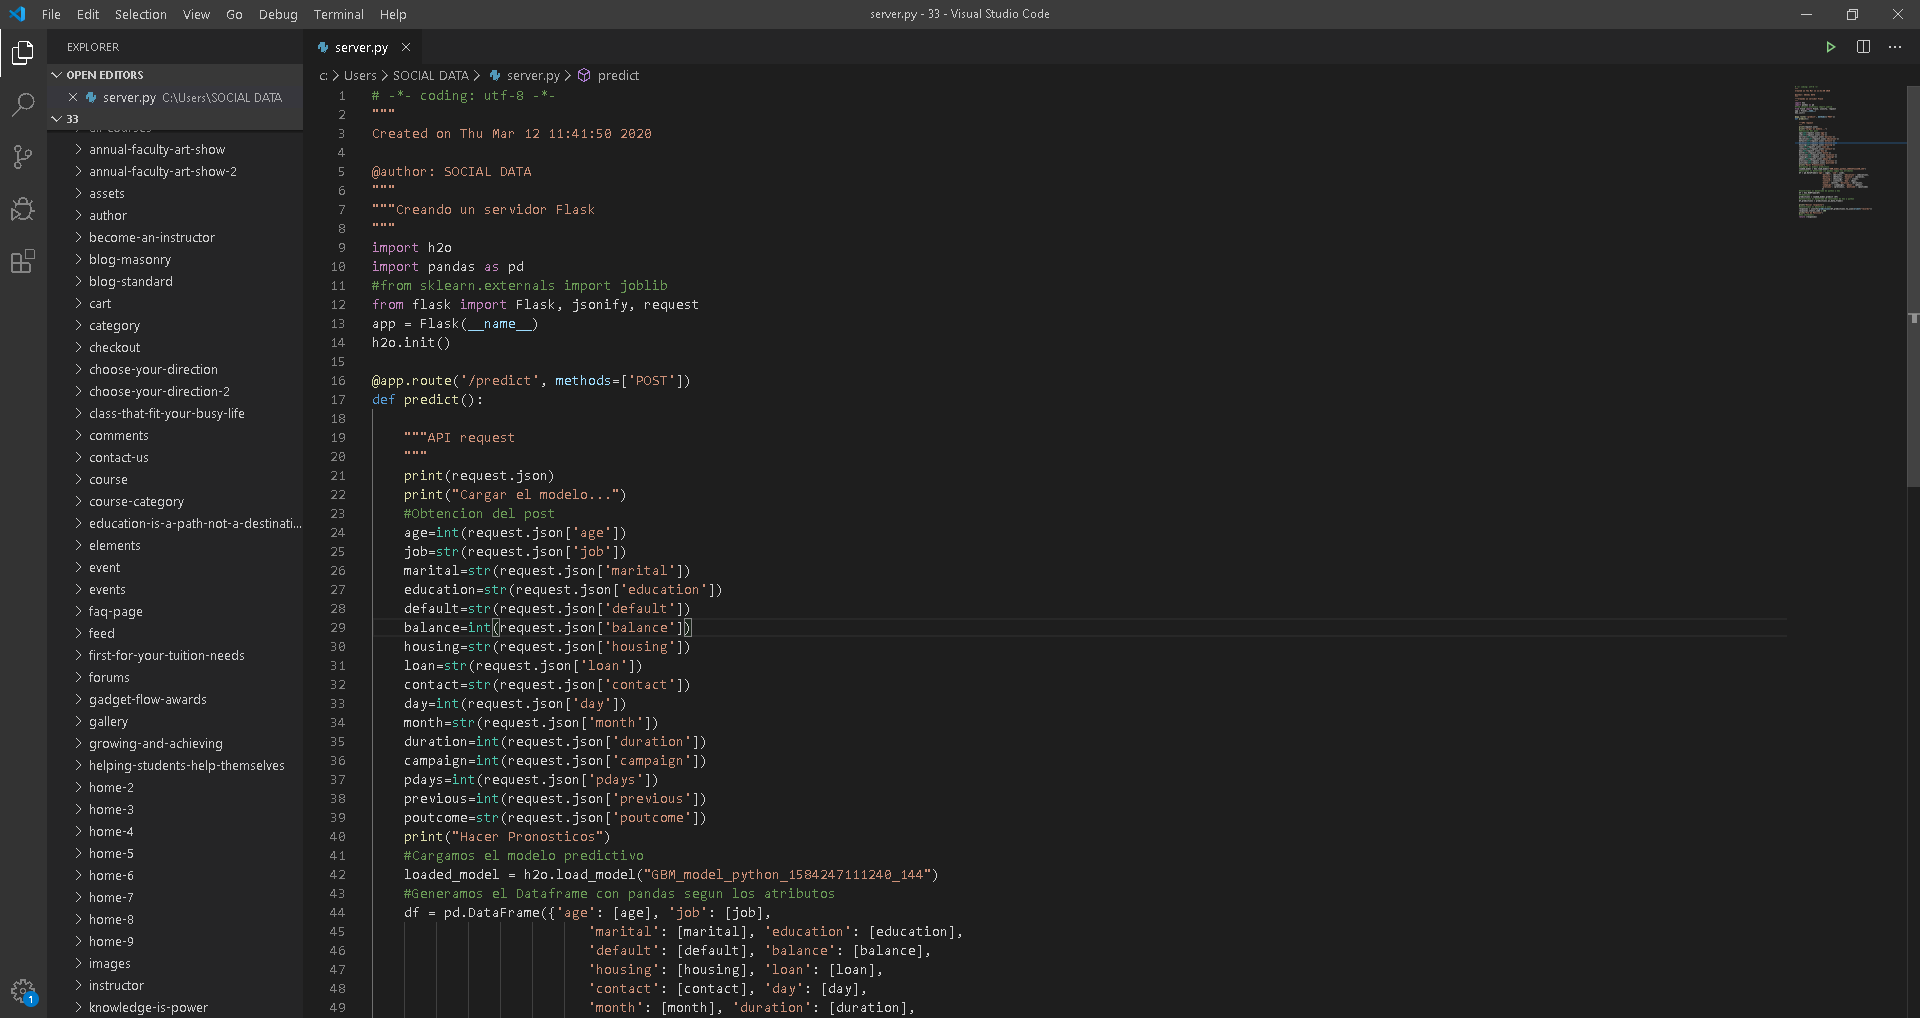

In [76]:
Image(filename='D:/Python/webinar/01_13.png', width=600) 

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 12 11:41:50 2020

@author: SOCIAL DATA
"""
"""Creando un servidor Flask
"""
import h2o
import pandas as pd
#from sklearn.externals import joblib
from flask import Flask, jsonify, request
app = Flask(__name__)
h2o.init()

@app.route('/predict', methods=['POST'])
def predict():
    
    """API request
    """
    print(request.json)	
    print("Cargar el modelo...")
    #Obtencion del post
    age=int(request.json['age'])
    job=str(request.json['job'])
    marital=str(request.json['marital'])
    education=str(request.json['education'])
    default=str(request.json['default'])
    balance=int(request.json['balance'])
    housing=str(request.json['housing'])
    loan=str(request.json['loan'])
    contact=str(request.json['contact'])
    day=int(request.json['day'])
    month=str(request.json['month'])
    duration=int(request.json['duration'])
    campaign=int(request.json['campaign'])
    pdays=int(request.json['pdays'])
    previous=int(request.json['previous'])
    poutcome=str(request.json['poutcome'])
    print("Hacer Pronosticos")
    #Cargamos el modelo predictivo
    loaded_model = h2o.load_model("GBM_model_python_1584247111240_144")
    #Generamos el Dataframe con pandas segun los atributos
    df = pd.DataFrame({'age': [age], 'job': [job],
                           'marital': [marital], 'education': [education],
                           'default': [default], 'balance': [balance],
                           'housing': [housing], 'loan': [loan],
                           'contact': [contact], 'day': [day],
                           'month': [month], 'duration': [duration],
                           'campaign': [campaign], 'pdays': [pdays],
                           'previous': [previous], 'poutcome': [poutcome]
                           })
    #Convertimos el dataframe de python a h2o
    hf = h2o.H2OFrame(df)
    #Predecimos
    predictions = loaded_model.predict (hf)
    #Convertimos el dataframe de resultados de h2o a python
    df_predictions = predictions.as_data_frame()
        
    print("Enviar respuesta")
    #Convertimos el dataframe a json
    responses = jsonify(predictions=df_predictions.to_json(orient="records"))
    responses.status_code = 200
    print("Fin de Peticion")
    #h2o.shutdown()
    return (responses)

Checking whether there is an H2O instance running at http://localhost:54321 .....

### Paso 2: Ejecutamos el siguiente código desde el Promtp de Anaconda

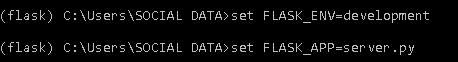

In [2]:
Image(filename='D:/Python/webinar/01_14.png', width=600) 

### Paso 3: Descargar e instalar Postman (https://www.postman.com/downloads/) 

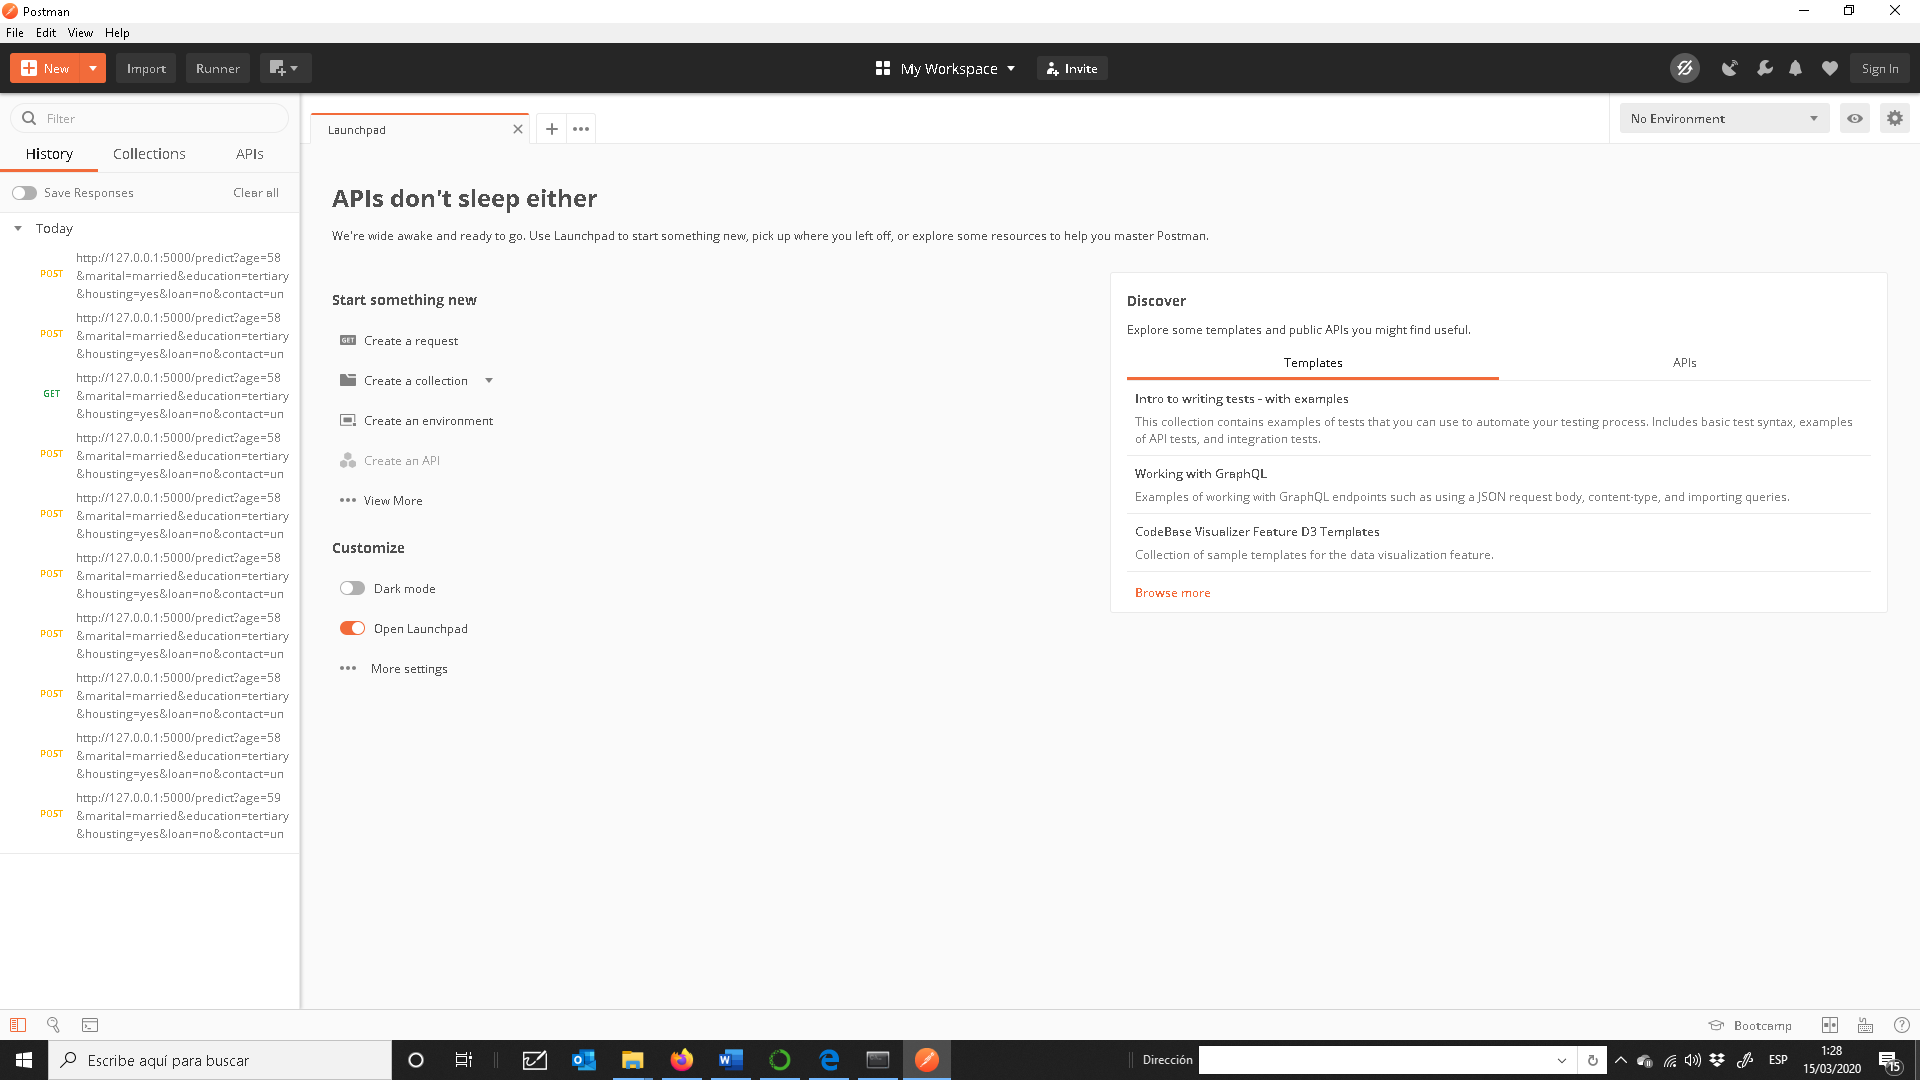

In [67]:
Image(filename='D:/Python/webinar/01_15.png', width=600) 

 ### Paso 4: Ejecutamos el api rest

In [68]:
Image(filename='D:/Python/webinar/01_16.png', width=600) 

**PD:** El flask run tiene que ser ejecutado en la misma ruta donde esta el **server.py**

 ### Paso 5: Abrimos CMD de Windows y ejecutamos la siguiente sentencia

curl -i -X POST -H "Content-Type: application/json" -d "{\"age\": \"58\",\"job\": \"management\",\"marital\": \"married\",\"education\": \"tertiary\",\"default\": \"no\",\"balance\": \"2143\",\"housing\": \"yes\",\"loan\": \"no\",\"contact\":\"unknown\" ,\"day\":\"5\",\"month\": \"may\",\"duration\": \"261\",\"campaign\": \"1\",\"pdays\": \"-1\",\"previous\": \"0\", \"poutcome\": \"unknown\" }" http://127.0.0.1:5000/predict

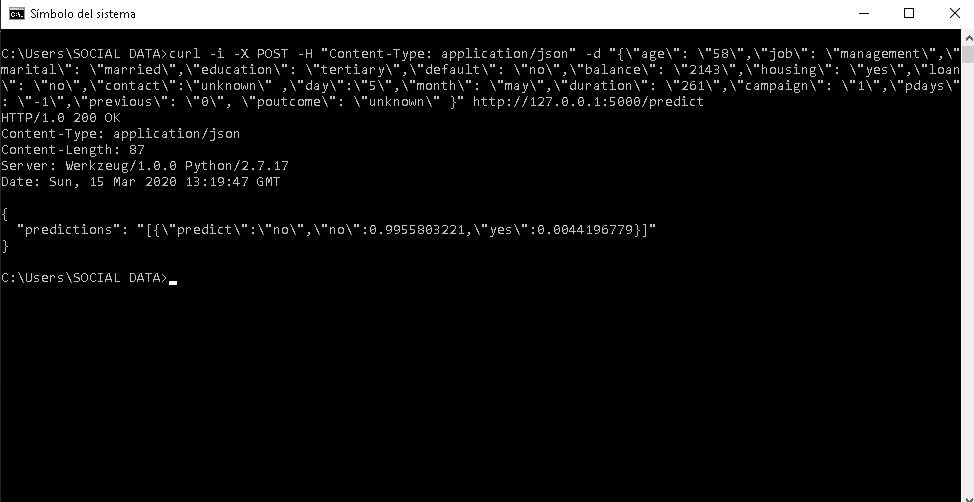

In [3]:
Image(filename='D:/Python/webinar/01_17.png', width=600) 